# Santander customer satisfaction: feature engineering

Improving data by transforming the features.

In [1]:
# starting up a console attached to this kernel
%matplotlib inline
%qtconsole
import os

# importing base code
os.chdir('/home/guilherme/Documents/Kaggle/santander-satisfaction/code')
from base import *

# changing to competition dir
os.chdir('/home/guilherme/Documents/Kaggle/santander-satisfaction')

# target variable
target = pd.read_csv('data/target.csv')

## Zero-sum feature

Counting how many columns are equal to 0.

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
75990    0
75991    0
75992    0
75993    0
75994    0
75995    0
75996    0
75997    0
75998    0
75999    0
76000    1
76001    0
76002    0
76003    0
76004    0
76005    0
76006    0
76007    1
76008    0
76009    0
76010    0
76011    0
76012    0
76013    0
76014    0
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, dtype: int64

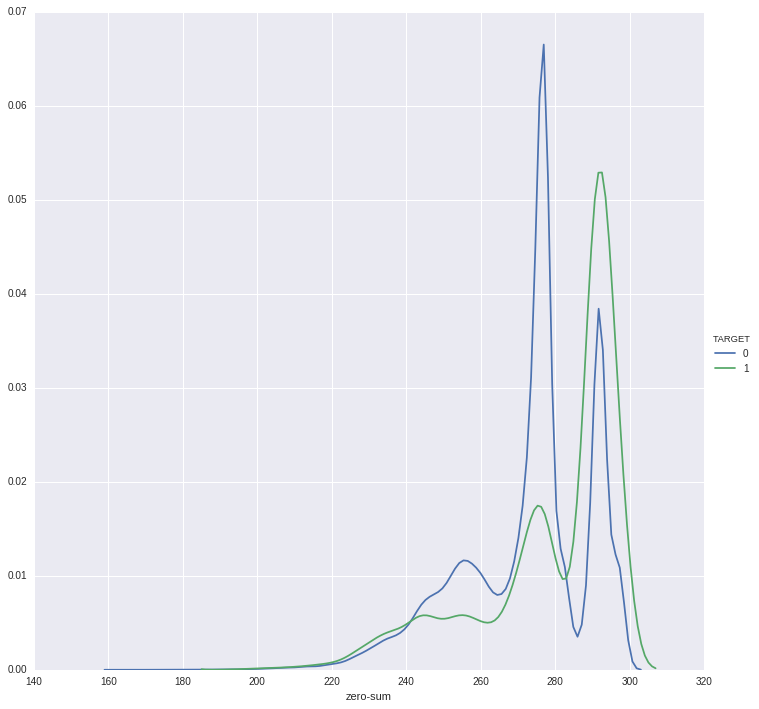

In [2]:
# reading train and test (real)
train = pd.read_csv('data/no-duplicates/train.csv')
test = pd.read_csv('data/no-duplicates/test.csv')

# creating features
train['zero-sum'] = (train == 0).sum(axis=1)
test['zero-sum'] = (test == 0).sum(axis=1)

train['TARGET'] = target

# visualize
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(sns.kdeplot, "zero-sum") \
   .add_legend()

train.pop('TARGET')
#train.to_csv('data/no-duplicates/train.csv', index=False)
#test.to_csv('data/no-duplicates/test.csv',index=False)

Let us split the zero-sum feature into bins.

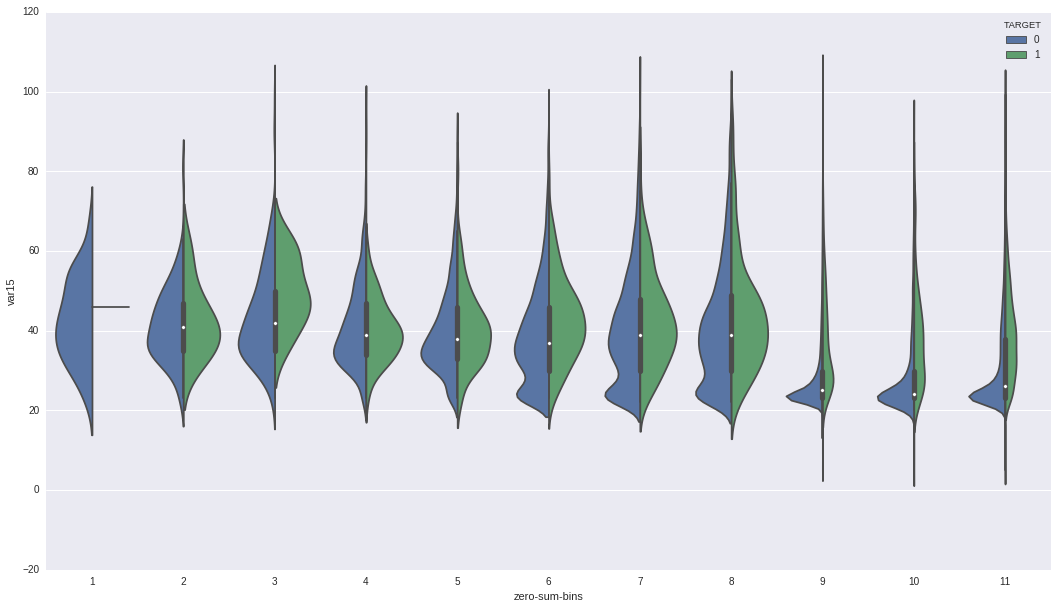

In [3]:
# splitting into bins
bins = np.array([0]+range(200,320,10))
train['zero-sum-bins'] = np.digitize(train['zero-sum'], bins)
test['zero-sum-bins'] = np.digitize(test['zero-sum'], bins)

plt.figure(figsize=[18,10])
train['TARGET'] = target
sns.violinplot(x="zero-sum-bins", y="var15", hue="TARGET", data=train, split=True);

One-hot encoding.

In [4]:
# loading categorical data
cat_train = load_obj('data/categorical/train')
cat_test = load_obj('data/categorical/test')

# getting new dummies
dummies_zs_train = csr_matrix(pd.get_dummies(train['zero-sum-bins'], prefix='zsb', prefix_sep='-'))
dummies_zs_test = csr_matrix(pd.get_dummies(test['zero-sum-bins'], prefix='zsb', prefix_sep='-'))

# updating
cat_train = hstack([cat_train, dummies_zs_train])
cat_test = hstack([cat_test, dummies_zs_test])

## var38

var38 has a lot of examples with the same value. This indicates a missing value treatment by the people at Santander. Let us fix it.

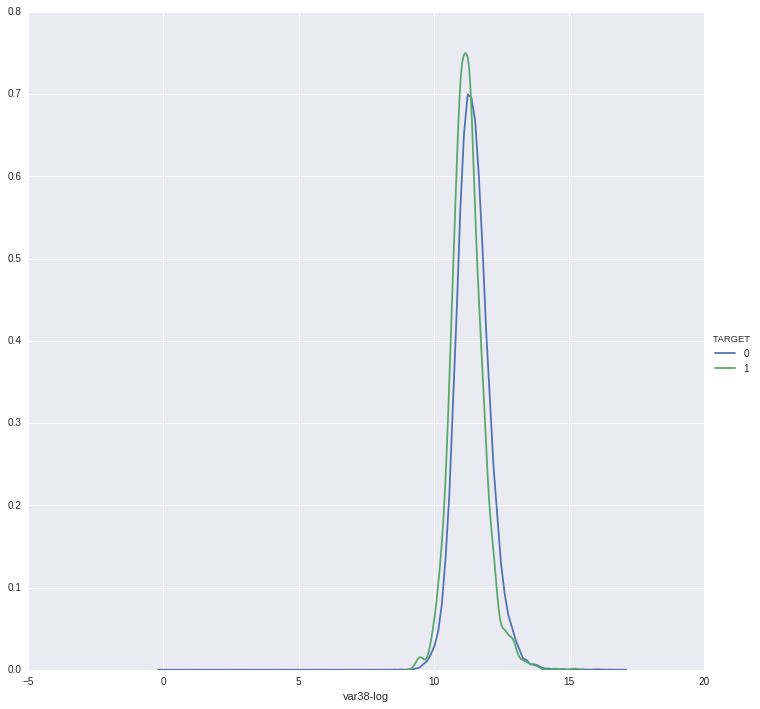

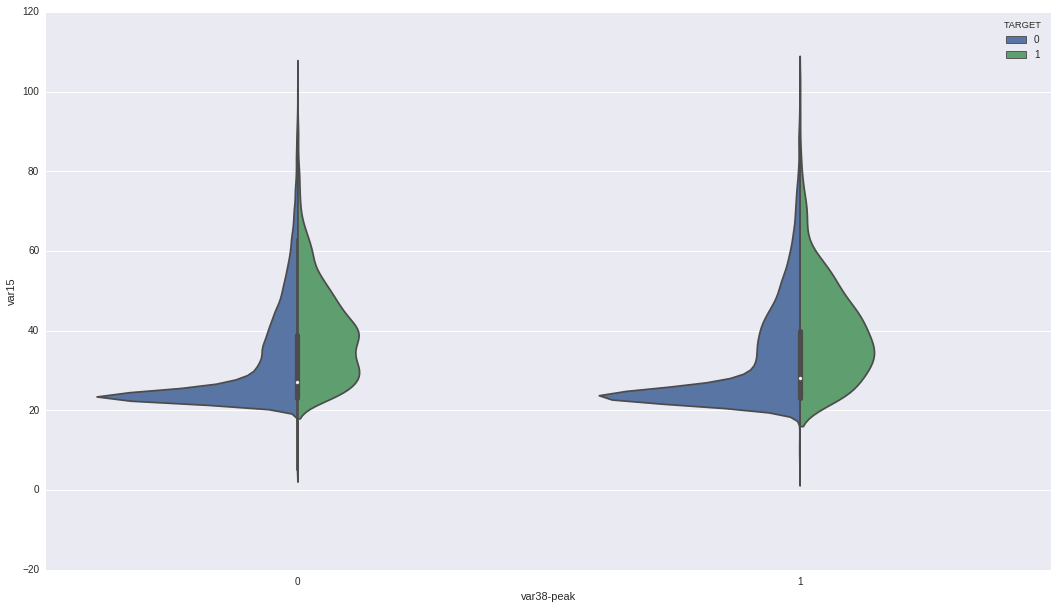

In [5]:
train['var38-peak'] = np.isclose(train['var38'], 117310.979016)
train['var38-log'] = train.loc[~train['var38-peak'], 'var38'].map(np.log)
train['var38-peak'] = train['var38-peak'].astype(int)
train.loc[train['var38-peak'], 'var38-log'] = 0
train.pop('var38')

test['var38-peak'] = np.isclose(test['var38'], 117310.979016)
test['var38-log'] = test.loc[~test['var38-peak'], 'var38'].map(np.log)
test['var38-peak'] = test['var38-peak'].astype(int)
test.loc[test['var38-peak'], 'var38-log'] = 0
test.pop('var38')

# plot
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(sns.kdeplot, "var38-log") \
   .add_legend()

# plot
plt.figure(figsize=[18,10])
sns.violinplot(x="var38-peak", y="var15", hue="TARGET", data=train, split=True);

## var3

va3 is suspected to be the country of the account holder. Let us explore it.

In [6]:
c_train = train.var3.value_counts()
c_test = test.var3.value_counts()

In [7]:
print c_train

 2.0         74165
 8.0           138
-999999.0      116
 9.0           110
 3.0           108
 1.0           105
 13.0           98
 7.0            97
 4.0            86
 12.0           85
 6.0            82
 0.0            75
 10.0           72
 11.0           66
 5.0            63
 14.0           61
 15.0           34
 18.0           10
 16.0            9
 17.0            7
 23.0            7
 142.0           6
 38.0            6
 20.0            6
 31.0            6
 25.0            6
 154.0           6
 138.0           5
 149.0           5
 30.0            5
             ...  
 79.0            1
 126.0           1
 84.0            1
 87.0            1
 119.0           1
 93.0            1
 238.0           1
 96.0            1
 97.0            1
 108.0           1
 106.0           1
 131.0           1
 72.0            1
 71.0            1
 139.0           1
 169.0           1
 168.0           1
 165.0           1
 101.0           1
 151.0           1
 57.0            1
 136.0      

In [8]:
print c_test

 2.0         73962
-999999.0      120
 8.0           116
 9.0           108
 13.0          107
 3.0           107
 1.0            99
 10.0           85
 11.0           85
 12.0           83
 0.0            76
 14.0           74
 7.0            73
 5.0            71
 6.0            70
 4.0            68
 15.0           29
 16.0           12
 18.0           10
 22.0            9
 185.0           9
 33.0            9
 17.0            9
 158.0           7
 27.0            7
 166.0           6
 21.0            6
 24.0            5
 174.0           5
 138.0           5
             ...  
 205.0           1
 206.0           1
 212.0           1
 214.0           1
 135.0           1
 134.0           1
 132.0           1
 131.0           1
 57.0            1
 62.0            1
 67.0            1
 79.0            1
 82.0            1
 83.0            1
 85.0            1
 86.0            1
 87.0            1
 94.0            1
 96.0            1
 99.0            1
 101.0           1
 103.0      

In [9]:
print 'number of "countries" in train:', len(c_train),'test:', len(c_test)

number of "countries" in train: 208 test: 199


Let us group the uncommon countries under the same categorical variable. So we will end up with 3 categories: 2 (most common), 1 (uncommon) and 0 (error code).

/home/guilherme/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/guilherme/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/guilherme/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/guilherme/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is try

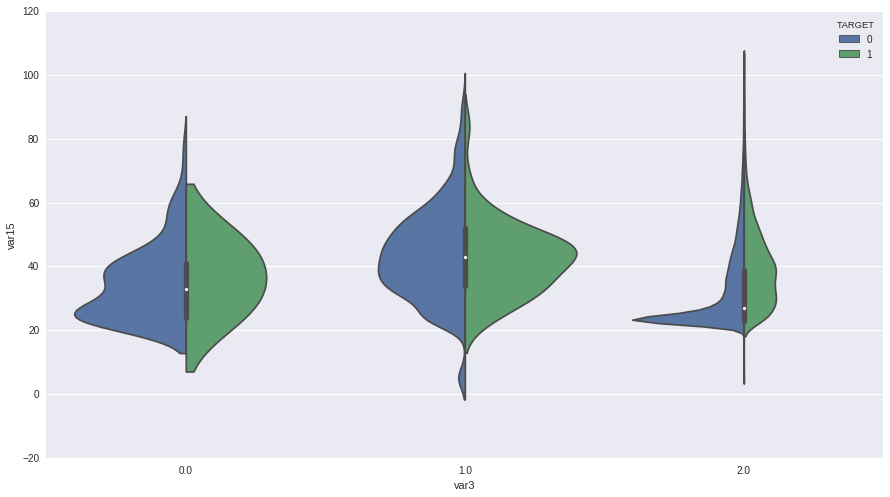

In [10]:
uncommon_train = [i for i in c_train.index if (c_train[i] < 500) and not (i == -999999)]
uncommon_test = [i for i in c_test.index if (c_test[i] < 500) and not (i == -999999)]

for val in uncommon_train:
    replace = train['var3'] == val
    train['var3'][replace] = 1

for val in uncommon_train + uncommon_test:
    replace = test['var3'] == val
    test['var3'][replace] = 1

# replace error codes
val = -999999
replace = train['var3'] == val
train['var3'][replace] = 0
replace = train['var3'] == val
train['var3'][replace] = 0
    
plt.figure(figsize=[15,8])
sns.violinplot(x="var3", y="var15", hue="TARGET", data=train, split=True);

In [11]:
# getting new dummies
dummies_var3_train = csr_matrix(pd.get_dummies(train['var3'], prefix='var3', prefix_sep='-'))
dummies_var3_test = csr_matrix(pd.get_dummies(test['var3'], prefix='var3', prefix_sep='-'))

# updating
cat_train = hstack([cat_train, dummies_var3_train])
cat_test = hstack([cat_test, dummies_var3_test])

## Saving

In [12]:
# removing target column
train.pop('TARGET')

# real-valued
train.to_csv('data/engineered-real/train.csv', index=False)
test.to_csv('data/engineered-real/test.csv', index=False)

# saving categorical data
save_obj(cat_train, 'data/engineered-cat/train')
save_obj(cat_test, 'data/engineered-cat/test')

## Non-linear Age (var15)

Age data is non-linear. Putting it in bins could improve result.

In [13]:
# loading data
# train
train = pd.read_csv('data/engineered-real/train.csv') 
test = pd.read_csv('data/engineered-real/test.csv') 

# test
train_cat = load_obj('data/engineered-cat/train')
test_cat = load_obj('data/engineered-cat/test')

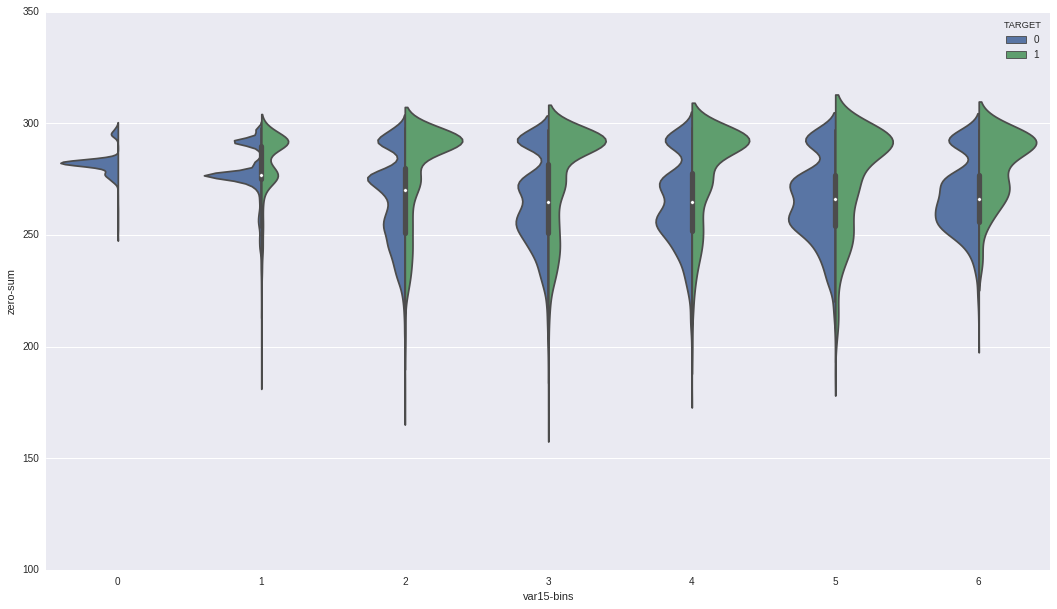

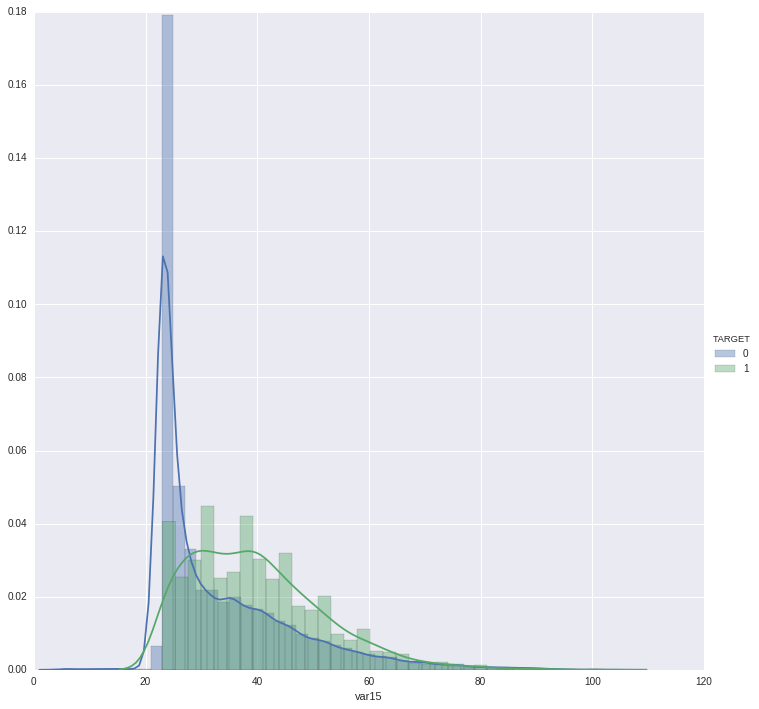

In [14]:
# Add categorical variables to discretize var15
# splitting into bins
bins = np.array([23, 30, 40, 50, 60, 70])
train['var15-bins'] = np.digitize(train['var15'], bins)
test['var15-bins'] = np.digitize(test['var15'], bins)

plt.figure(figsize=[18,10])
train['TARGET'] = target

sns.violinplot(x="var15-bins", y="zero-sum", hue="TARGET", data=train, split=True);

# plot
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(sns.distplot, "var15") \
   .add_legend();

# getting new dummies
dummies_v15_train = csr_matrix(pd.get_dummies(train["var15-bins"], prefix='v15b', prefix_sep='-'))
dummies_v15_test = csr_matrix(pd.get_dummies(test["var15-bins"], prefix='v15b', prefix_sep='-'))

# updating
train_cat = hstack([train_cat, dummies_v15_train])
test_cat = hstack([test_cat, dummies_v15_test])

## Similar variables

Some variables are expressed as time series. Let us analyse them.

In [15]:
# getting linked variables
# imp prefix - getting all
imp_all = [c for c in train.columns if c.startswith('imp')]

# spreading into subsets
imp_op = [c for c in imp_all if c.startswith('imp_op')]
imp_aport = [c for c in imp_all if c.startswith('imp_aport')]
imp_trasp = [c for c in imp_all if c.startswith('imp_trasp')]
imp_reemb = [c for c in imp_all if c.startswith('imp_reemb')]
imp_compra = [c for c in imp_all if c.startswith('imp_compra')]

# updating all
imp_all = [c for c in imp_all if c not in imp_op + imp_aport + imp_trasp + imp_reemb + imp_compra]

# saldo prefix - getting all
saldo = [c.replace('_medio_','_') for c in train.columns if c.startswith('saldo')]

# delta
delta = [c for c in train.columns if c.startswith('delta')]

## Interactions of same variable

Suffixes hace e ult indicate time series. Let us explore them.

In [16]:
# grouping same variables
# will generate new features from these groups
var_names = list(set([s[6:min(len(s), find_nth(s,'_',2))] for s in saldo]))

saldo_dict ={}
for v in var_names:
    saldo_dict[v] = target
    col_names = [s for s in [c for c in train.columns if c.startswith('saldo')] if v in s]
    for c in col_names:
        saldo_dict[v] = pd.concat([saldo_dict[v],train[c]], axis=1)

In [ ]:
feat_exp = FeatureExpansion()
for var in saldo_dict.keys():
    df = saldo_dict[var].drop('TARGET', axis=1)
    for r in range(6):
        df, op_log = feat_exp.fit_transform(df,10)

## Stability selection

Too expensive to do on CV. Do it separately and add as a new dataset.

In [ ]:
# loading data
# train
train = pd.read_csv('data/engineered-real/train.csv') 
test = pd.read_csv('data/engineered-real/test.csv') 

cols = train.columns

# joining
train = hstack([csr_matrix(train), load_obj('data/engineered-cat/train')]).tocsr()
test = hstack([csr_matrix(test), load_obj('data/engineered-cat/test')]).tocsr()

p = preprocessing({'na_input': {'strategy': 'mean'}})

train = p.fit_transform(train, target)
test = p.transform(test)

# feature selection algo
sel = RandomizedLogisticRegression(sample_fraction=0.50, n_resampling=500, 
                                   selection_threshold=0.0)
# transforming
train = sel.fit_transform(train.todense(), np.array(target['TARGET']))
test = sel.transform(test.todense())
    
sel_cols = cols[sel.scores_[0:len(cols)]>0]
sel_scores = sel.scores_[sel.scores_[0:len(cols)]>0]

print [x for (y,x) in sorted(zip(sel_scores, sel_cols), key=lambda pair: pair[0], reverse=True)] 

train = csr_matrix(train)
test = csr_matrix(test)

load_obj('data/selected/st-train')
load_obj('data/selected/st-test')

In [ ]:
%qtconsole